# Άσκηση 1

Αρχικά ας βάλουμε στο πρόγραμμα τις βιβλιοθήκες που θα χρειαστούμε

In [54]:
import numpy as np
import scipy as sp
from astropy.table import Table, Column
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d
from scipy.interpolate import PchipInterpolator

Ας γράψουμε μία συνάρτηση για τον υπολογισμό των y

In [78]:
def f(x):
    return 3*x*np.exp(x)-np.exp(2*x)+3
def ff(x):
    return -np.exp(x)*(2*np.exp(x)-3*x-3)

Βρίσκουμε τα ζεύγη:

In [7]:
A = [(-1,f(-1)),(0,f(0)),(1,f(1)),(2,f(2))]
A

[(-1, 1.7610263932490602),
 (0, 2.0),
 (1, 3.7657893864464853),
 (2, -7.263813439560337)]

In [9]:
data = Table(rows = A,names=('x', 'y') )
print(data)

 x          y         
--- ------------------
 -1 1.7610263932490602
  0                2.0
  1 3.7657893864464853
  2 -7.263813439560337


In [10]:
x_data = np.array(data['x'])
y_data = np.array(data['y'])

Η βιβλιοθήκη scipy έχει ενσωματομένες συναρτήσεις για τον υπολογισμό των πολυωνύμων Lagrance από ζεύγη αριθμών

In [98]:
plang = sp.interpolate.lagrange(x_data, y_data)
display(plang)
print(np.poly1d(plang))

                      

poly1d([-2.38703467,  0.76340789,  3.38941616,  2.        ])

        3          2
-2.387 x + 0.7634 x + 3.389 x + 2


Εμφανίζονται με τη σειρά ax^3 + bx^2 +cx +d

Πρακτικά έχουμε βρει ό,τι μας ζήτησε η άσκηση. Ας δούμε όμως πως ταιριάζει το πολυώνυμο στη συνάρτηση

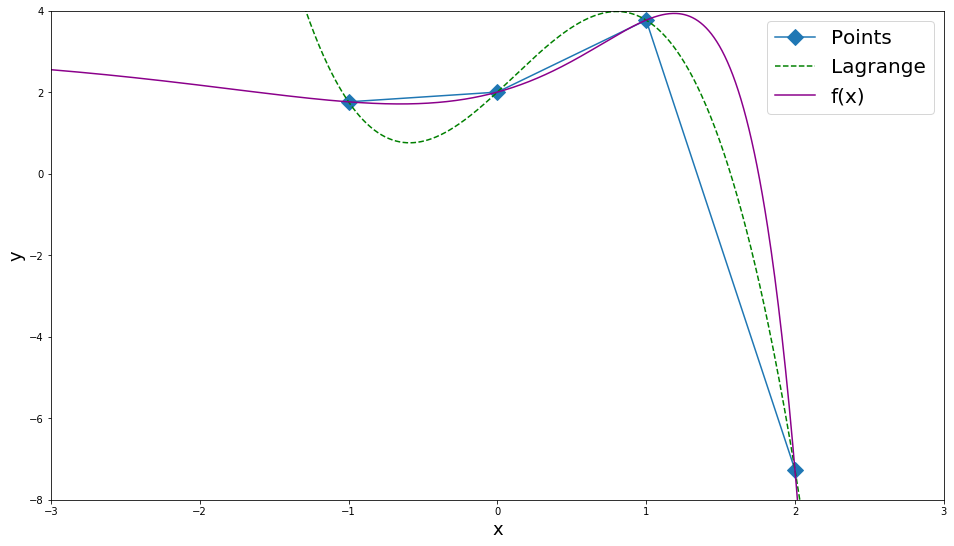

In [53]:
plt.figure(figsize=(16,9))

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.axis([-3, 3,-8, 4])

xpoints = np.linspace(-3,3,1000)
def P(x):
    return -2.387*(x**3)+0.7634*(x**2)+3.389*x+2
Ppoints = P(xpoints)
fpoints = f(xpoints)

plt.plot(x_data,y_data, marker = 'D',markersize=12, label = "Points")
plt.plot(xpoints, Ppoints, linestyle='dashed', color ='green', label = "Lagrange")
plt.plot(xpoints,fpoints, color = 'DarkMagenta', label ="f(x)")

plt.legend(loc = "best", prop={'size': 20})
plt.show()

# Άσκηση 2

In [129]:
data2 = Table(rows = [(1,3.7657893864464853),(2,-7.263813439560337)],names=('x', 'y') )
print(data2)
x2 = np.array(data2['x'])
y2 = np.array(data2['y'])

 x          y         
--- ------------------
  1 3.7657893864464853
  2 -7.263813439560337


1.7610263932490602
-7.263813439560337
-0.2706705664732254
-42.69479517591263


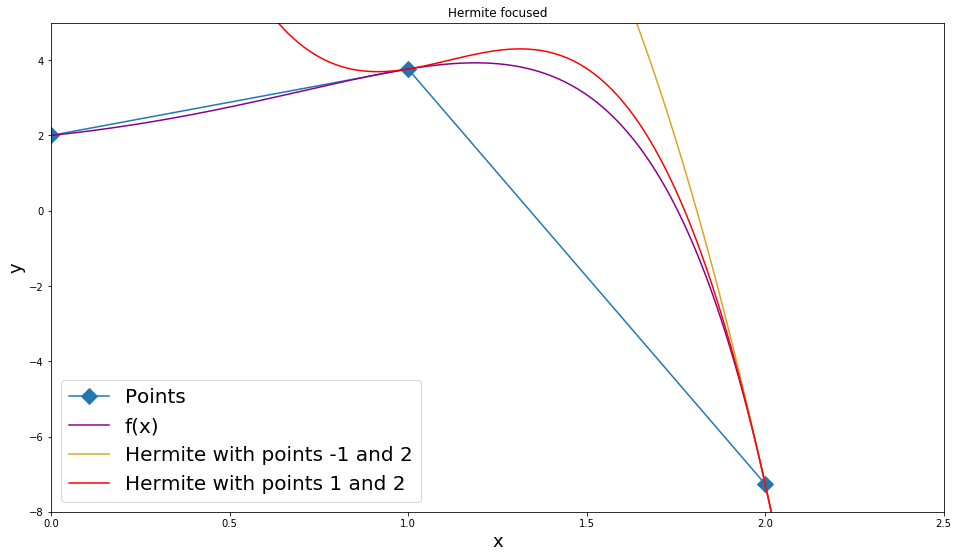

In [145]:
pchip = PchipInterpolator(x2,y2)
x_pchip = np.arange(-2, 2, 0.01)
y_pchip = pchip(x_pchip)
print(f(-1))
print(f(2))
print(ff(-1))
print(ff(2))
def H(x):
    H = -4.10543*(x**3)-0.912536*(x**2)+10.2206*(x)+8.78869
    return H
def H2(x):
    H = 27.881050516665724-68.86611178433745*x+63.85486140512421*(x**2)-19.104010751006*(x**3)
    return H
plt.figure(figsize=(16,9))

xpoints = np.linspace(-3,3,1000)

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.axis([0, 2.5,-8, 5])
hpoints = H(xpoints)
h2points = H2(xpoints)

plt.plot(x_data,y_data, marker = 'D',markersize=12, label = "Points")
plt.plot(xpoints,fpoints, color = 'DarkMagenta', label ="f(x)")
plt.plot(xpoints,hpoints, color = 'GoldenRod', label = "Hermite with points -1 and 2")
plt.plot(xpoints,h2points, color = 'Red', label="Hermite with points 1 and 2")
plt.title("Hermite focused")
plt.legend(loc = "best", prop={'size': 20})
plt.show()

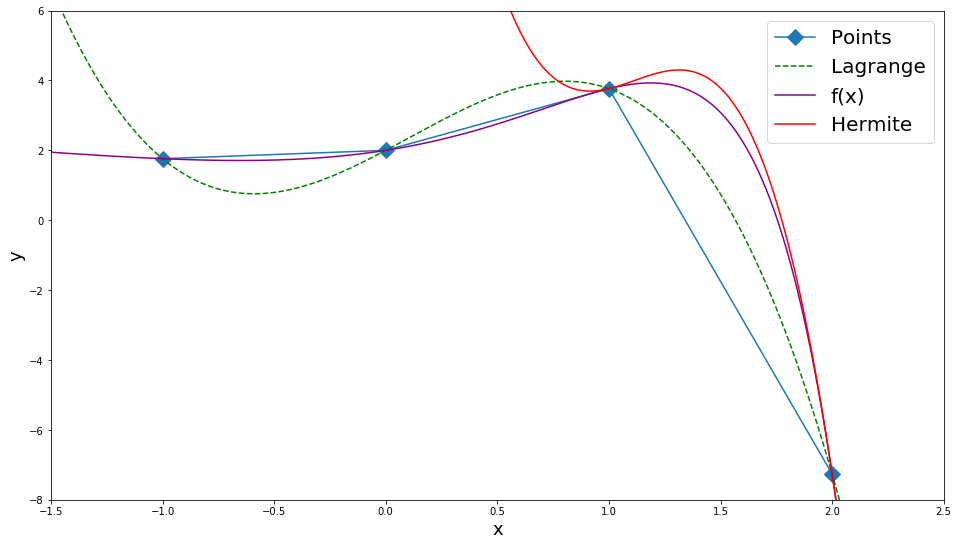

In [146]:
plt.figure(figsize=(16,9))

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.axis([-1.5, 2.5,-8, 6])
hpoints = H(xpoints)

xpoints = np.linspace(-3,3,1000)
plt.plot(x_data,y_data, marker = 'D',markersize=12, label = "Points")
plt.plot(xpoints, Ppoints, linestyle='dashed', color ='green', label = "Lagrange")
plt.plot(xpoints,fpoints, color = 'DarkMagenta', label ="f(x)")
plt.plot(xpoints,h2points, color = 'Red', label="Hermite")
plt.legend(loc = "best", prop={'size': 20})
plt.show()

Προσπάθεια με περισσότερα σημεία

 x          y         
--- ------------------
 -1 1.7610263932490602
  0                2.0
  1 3.7657893864464853
  2 -7.263813439560337


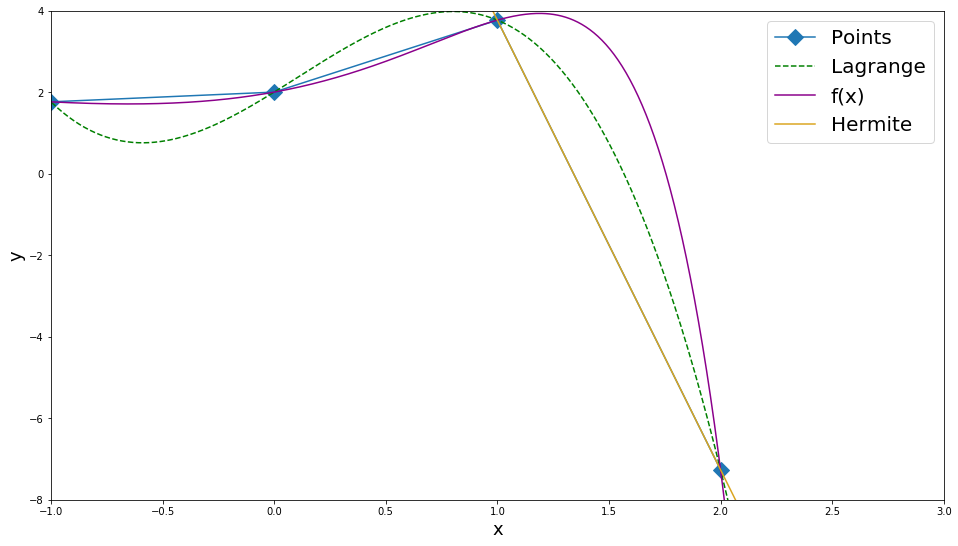

In [147]:
data3 = Table(rows = A,names=('x', 'y') )
print(data3)
x3 = np.array(data3['x'])
y3 = np.array(data3['y'])
pchip2 = PchipInterpolator(x3,y3)
x_pchip2 = np.arange(-3, 3, 0.01)
y_pchip2 = pchip(x_pchip2)

xpoints = np.linspace(-3,3,1000)
plt.figure(figsize=(16,9))

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.axis([-1, 3,-8, 4])


plt.plot(x_data,y_data, marker = 'D',markersize=12, label = "Points")
plt.plot(xpoints, Ppoints, linestyle='dashed', color ='green', label = "Lagrange")
plt.plot(xpoints,fpoints, color = 'DarkMagenta', label ="f(x)")
plt.plot(x_pchip2,y_pchip2, color = 'GoldenRod', label = "Hermite")

plt.legend(loc = "best", prop={'size': 20})
plt.show()

Δεν καταλαβαίνω γιατί δε λειτουργεί....Μάλλον η pchip απλά ενώνει τα σημεία;

Ας βρούμε τα σφάλματα

Το σφάλμα του τύπου Lagrange θα είναι:


The Error of the Lagrange is: -0.01884769016560835 and compared to the value of f(1.5): -0.00611528210248176
The error between the value of P and that of f is -2.337038893333622
The relative error between f and P is: 75.82707478545598 %
3.082063893333622
0.745025


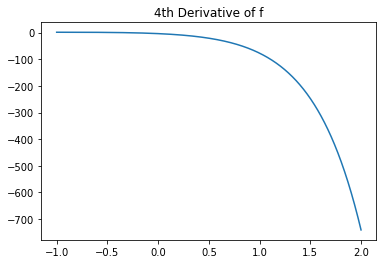

In [148]:
def f4(x):
    return -np.exp(x)*(16*np.exp(x)-3*x-12)
xpoints = np.linspace(-1,2,1000)
f4points = f4(xpoints)
plt.plot(xpoints,f4points)
plt.title('4th Derivative of f')

def EL(x,y):
    p = 1*2*3*4
    E = (x+1)*(x)*(x-1)*(x-2)*f4(y)/p
    return E
#for x=1.5 (&y=-0.5 cause it's about where the fourth derivative exhibits a maximum )
e = EL(1.5,-0.5)
p = f(1.5)
k = e/p
t = P(1.5)-f(1.5)
print('The Error of the Lagrange is:', e, 'and compared to the value of f(1.5):', k)
print("The error between the value of P and that of f is", t)
print("The relative error between f and P is:",(abs(t)/p)*100,"%")
print(f(1.5))
print(P(1.5))

Για τα Hermit:

In [151]:

yh = H2(1.5)
d = yh-f(1.5)
print("The Hermit polynomial finds for x = 1.5:",yh)
print("That differs from f by:",d)
print("The relative error is:", abs(d)*100/p,"%")

The Hermit polynomial finds for x = 1.5: 3.7792847170437653
That differs from f by: 0.6972208237101434
The relative error is: 22.62188091616801 %


# Άσκηση 3

Η άσκηση 3 δεν χρειάστηκε προγραμματιστική βοήθεια